In [11]:
import pandas as pd
import matplotlib.pyplot as plt

path_happiness='data/happiness data.xlsx'
path_lifespan = 'data/lifespan.csv'
path_gdp = 'data/GDP.csv'
path_education = 'data/Global_Education.csv'

df_happiness = pd.read_excel(path_happiness)
df_lifespan  = pd.read_csv(path_lifespan)
df_gdp  = pd.read_csv(path_gdp)
df_education = pd.read_csv(path_education)

df_happiness = df_happiness[df_happiness['Year'] == 2023].reset_index()

df_happiness = df_happiness[['Country name','Ladder score']]
df_lifespan = df_lifespan[['Country Name','2023']]
df_gdp = df_gdp[['Country Name','2023']]
df_education = df_education[['Countries and areas','Youth_15_24_Literacy_Rate_Male','Youth_15_24_Literacy_Rate_Female','Unemployment_Rate','Birth_Rate']]

df_happiness = df_happiness.rename(columns={'Country name':'Country Name'})
df_lifespan = df_lifespan.rename(columns={'2023':'Life Expectancy'})
df_gdp = df_gdp.rename(columns={'2023':'GDP per Capita'})
df_education = df_education.rename(columns={'Countries and areas':'Country Name','Youth_15_24_Literacy_Rate_Male':'Male Lit Rate',
                                            'Youth_15_24_Literacy_Rate_Female':'Female Lit Rate','Unemployment_Rate':'Unemployment Rate',
                                            'Birth_Rate':'Birth Rate'})


In [10]:
df_merged_1 = pd.merge(df_happiness, df_lifespan, on='Country Name')
df_merged_2 = pd.merge(df_merged_1, df_gdp, on='Country Name')
df_merged = pd.merge(df_merged_2, df_education, on='Country Name')

display(df_merged)

,Country Name,Ladder score,Life Expectancy,GDP per Capita,Male Lit Rate,Female Lit Rate,Unemployment Rate,Birth Rate
0,Afghanistan,1.721,66.035000,415.707417,74,56,11.12,32.49
1,Albania,5.304,79.602000,8575.171134,99,100,12.33,11.78
2,Algeria,5.364,76.261000,5364.027950,98,97,11.70,24.28
3,Argentina,6.188,77.395000,14187.482725,99,100,9.79,17.02
4,Armenia,5.455,77.465854,8053.010663,0,0,16.99,13.99
...,...,...,...,...,...,...,...,...
116,United States,6.725,78.385366,82769.412211,0,0,14.70,11.60
117,Uruguay,6.611,78.138000,22797.811173,99,99,8.73,13.86
118,Uzbekistan,6.195,72.388000,2849.514611,100,100,5.92,23.30
119,Zambia,3.502,66.349000,1330.727806,93,92,11.43,36.19


<Axes: xlabel='Life Expectancy', ylabel='Ladder score'>

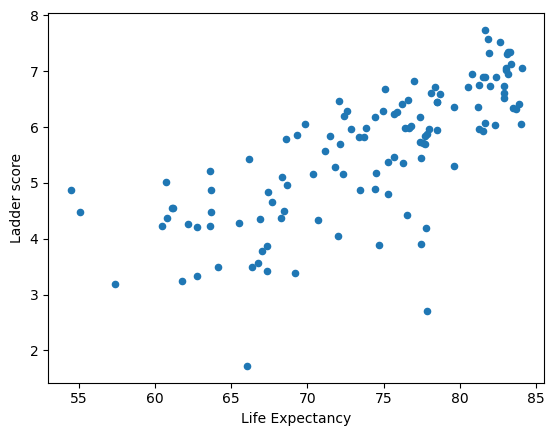

In [20]:
df_merged.plot.scatter(x='Life Expectancy',y='Ladder score')

In [23]:
feature_path = 'models/feature_importances.csv'
df_fi = pd.read_csv(feature_path)
display(df_fi)

,Feature,Importance
0,GDP per Capita,0.751781
1,Life Expectancy,0.107392
2,Birth Rate,0.071321
3,Unemployment Rate,0.051001
4,Female Lit Rate,0.009651
5,Male Lit Rate,0.008855
